# 0. Introduction

One of the preprocessing steps in machine learning is feature encoding. It is the process of turning categorical data in a dataset into numerical data. It is important that we perform feature encoding because most machine learning algorithms only handle numerical data and not data in text form.

In this notebook, we will learn the difference between nominal variables and ordinal variables. In addition, we will explore how [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) and [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder) can be used to transform these variables as part of a machine learning pipeline.

We will use this pipeline to predict the mean test score of different students. This is a regression problem in machine learning.

#  1. Import libraries

In [1]:
# Data wrangling
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Import and read data

In [2]:
data = pd.read_csv("C:/Users/Jason Chong/Documents/Kaggle/Exam/data.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
print("Data shape: ", data.shape)

Data shape:  (1000, 8)


# 3. Data description

The [students performance in exams dataset](https://www.kaggle.com/spscientist/students-performance-in-exams) on Kaggle consists of marks secured by 1,000 students in the math, reading and writing subjects. Along with these test scores, the description of each student such as their gender, race/ethnicity, parental level of education, lunch and test preparation course are also included in the dataset. 

The goal of this project is to build a machine learning model that can predict students' test score given their description. To reiterate, this is a regression problem in machine learning. 

# 4. Missing values and data types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Hooray, no missing values!

In [5]:
data.dtypes.value_counts()

object    5
int64     3
dtype: int64

We have 5 categorical variables and 3 numerical variables.

As it turns out, all the predictor variables are categorical variables and all the target variables are numerical variables. 

# 5. Create target variable (mean score)

For simplicity purposes, let's take the average of the 3 test scores so that we are left with only one target variable to predict. 

In [6]:
score = data[['math score', 'reading score', 'writing score']]
score.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


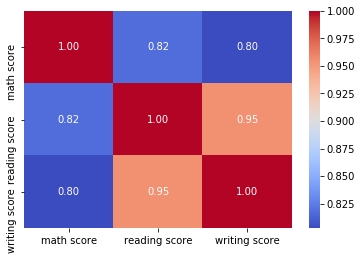

In [7]:
# Correlation between test scores

correlation = score.corr()
sns.heatmap(correlation, annot = True, fmt = '.2f', cmap = 'coolwarm')

Since the 3 test scores are highly positively correlated with each other, it is appropriate for us to take the average. 

In [8]:
# Calculate average of all test results
data['mean score'] = data.mean(axis = 1)

# Drop math score, reading score and writing score
data = data.drop(['math score', 'reading score', 'writing score'], axis = 1)

# Show first 5 rows of new dataframe
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


In [9]:
# Mean score data type

print("Mean score data type: ", data['mean score'].dtype)

Mean score data type:  float64


# 6. Exploratory data analysis (EDA)

Exploratory data analysis is the process of analysing and visualising the variables in a dataset. This step is not necessary for feature encoding but I personally like to examine my data first before performing any machine learning. So, feel free to skip past this section if you are only interested to learn about feature encoding. 

# 6.1 Predictor variables

The predictor variables in the dataset are:

- Gender
- Race/ethnicity
- Parental level of education
- Lunch
- Test preparation course

In this section, we will explore how these different features influence the outcome of a student's test score. 

## 6.1.1 Gender

In [10]:
# Mean score by gender 

data[['gender', 'mean score']].groupby('gender', as_index = False).mean().sort_values(by = 'mean score', ascending = False, ignore_index = True)

,gender,mean score
0,female,69.569498
1,male,65.837483


Text(0.5, 1.0, 'Mean Score by Gender')

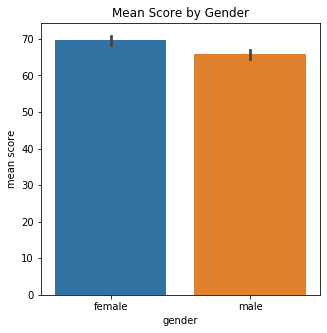

In [11]:
# Mean score by gender barplot

plt.figure(figsize = (5, 5))
sns.barplot(x = 'gender', y = 'mean score', data = data)
plt.title('Mean Score by Gender')

Female students perform better than male students on average. 

## 6.1.2 Race/ethnicity

In [12]:
# Mean score by race/ethnicity

data[['race/ethnicity', 'mean score']].groupby('race/ethnicity', as_index = False).mean().sort_values(by = 'mean score', ascending = False, ignore_index = True)

,race/ethnicity,mean score
0,group E,72.752381
1,group D,69.179389
2,group C,67.131661
3,group B,65.468421
4,group A,62.992509


Text(0.5, 1.0, 'Mean Score by Race/Ethnicity')

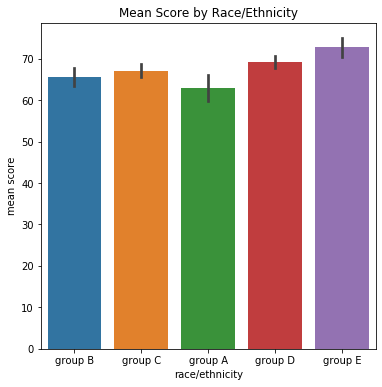

In [13]:
# Mean score by race/ethnicity barplot

plt.figure(figsize = (6, 6))
sns.barplot(x = 'race/ethnicity', y = 'mean score', data = data)
plt.title('Mean Score by Race/Ethnicity')

There seems to be an increasing trend in mean test scores as we move from group A to group E i.e. group A students perform the worst while group E students perform the best.

However, in the absence of any further information, it is hard for us to draw any conclusion. 

## 6.1.3 Parental level of education

In [14]:
# Mean score by parental level of education 

data[['parental level of education', 'mean score']].groupby('parental level of education', as_index = False).mean().sort_values(by = 'mean score', ascending = False, ignore_index = True)

,parental level of education,mean score
0,master's degree,73.598870
1,bachelor's degree,71.923729
2,associate's degree,69.569069
3,some college,68.476401
4,some high school,65.108007
5,high school,63.096939


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

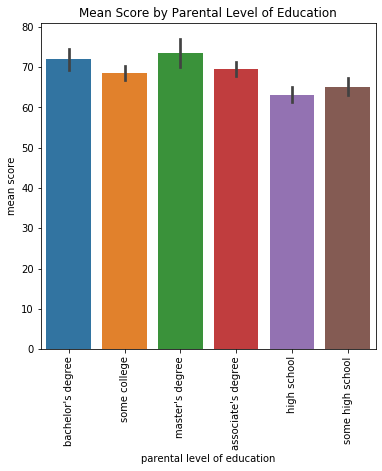

In [15]:
# Mean score by parental level of education barplot

plt.figure(figsize = (6, 6))
sns.barplot(x = 'parental level of education', y = 'mean score', data = data)
plt.title('Mean Score by Parental Level of Education')
plt.xticks(rotation = 90)

For the most part, the results are aligned with what we would expect i.e. as parental level of education increases, mean test score also increases. 

## 6.1.4 Lunch

In [16]:
# Mean score by lunch

data[['lunch', 'mean score']].groupby('lunch', as_index = False).mean().sort_values(by = 'mean score', ascending = False, ignore_index = True)

,lunch,mean score
0,standard,70.837209
1,free/reduced,62.199061


Text(0.5, 1.0, 'Mean Score by Lunch')

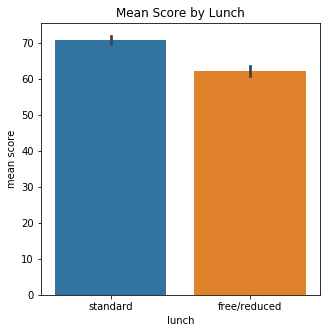

In [17]:
# Mean score by lunch barplot

plt.figure(figsize = (5, 5))
sns.barplot(x = 'lunch', y = 'mean score', data = data)
plt.title('Mean Score by Lunch')

Students with standard lunch perform better than those with free/reduced lunch. 

Lunch can be seen as a proxy for the financial background of the students. Therefore, it makes sense that students that financially better off do better in school compared to those that are of financially worse off, on average. 

## 6.1.5 Test preparation course

In [18]:
# Mean score by test preparation course 

data[['test preparation course', 'mean score']].groupby('test preparation course', as_index = False).mean().sort_values(by = 'mean score', ascending = False, ignore_index = True)

,test preparation course,mean score
0,completed,72.669460
1,none,65.038941


Text(0.5, 1.0, 'Mean Score by Test Preparation Course')

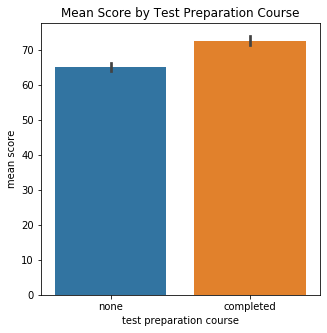

In [19]:
# Mean score by test preparation course barplot

plt.figure(figsize = (5, 5))
sns.barplot(x = 'test preparation course', y = 'mean score', data = data)
plt.title('Mean Score by Test Preparation Course')

This should come at no surprise at all. The more prepared students are for their exam, the better they will perform. 

# 6.2 Target variable (mean score)

In [20]:
# Mean score summary statistics

data['mean score'].describe()

count    1000.000000
mean       67.770667
std        14.257326
min         9.000000
25%        58.333333
50%        68.333333
75%        77.666667
max       100.000000
Name: mean score, dtype: float64

Text(0.5, 1.0, 'Distribution of Mean Score')

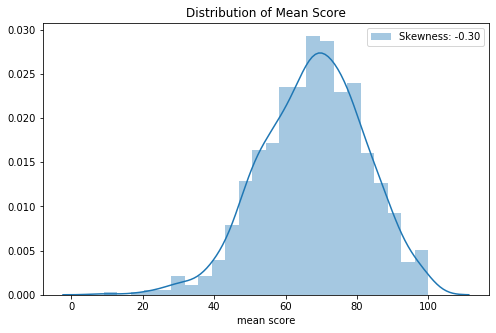

In [21]:
# Distribution of mean score 

plt.figure(figsize = (8, 5))
sns.distplot(data['mean score'], label = 'Skewness: {:.2f}'.format(data['mean score'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of Mean Score')

# 7. Feature encoding

Now that we have fully explored the variables in the dataset, we can move on to getting the dataset reading for modelling. More specifically, we want to turn the categorical data in our dataset into numerical data. This process is otherwise known as feature encoding.

But before we dive into feature encoding, it is important that we first contrast the difference between a nominal variable and an ordinal variable. This is so that we can match the right encoder to the right variable. 

Nominal variable is a categorical variable where its data does not have a logical ordering. Some examples of nominal data are:
- Male and female
- Location A, location B and location C

Ordinal variable, on the other hand, is also a categorical variable but its data follows a logical ordering. Some example of ordinal data include:
- Small, medium and large
- Bad, neutral and good
- Children, adults and seniors
- Low, medium and high income

As we will see in this section, nominal variables are encoded using OneHotEncoder while ordinal variables are encoded using OrdinalEncoder.

In [22]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


# 7.1 Encoding nominal variables

The nominal variables in our dataset include:

- Gender
- Race/ethnicity
- Lunch
- Test prepation course

In this section, we will explore two different ways to encode nominal variables, one using the Scikit-learn OneHotEncoder while the other using the [Pandas get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html). 

## 7.1.1 Scikit-learn OneHotEncoder

In [23]:
# Instantiate OneHotEncoder

ohe = OneHotEncoder(sparse = False)

In [24]:
# Apply OneHotEncoder to the gender column 

ohe.fit_transform(data[['gender']])[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [25]:
# The first 5 rows the gender column for comparison

data['gender'].head()

0    female
1    female
2    female
3      male
4      male
Name: gender, dtype: object

In [26]:
# Gender categories in OneHotEncoder 

ohe.categories_

[array(['female', 'male'], dtype=object)]

As we can see, OneHotEncoder has created two columns to represent the gender feature in our dataframe, one for female and one for male.

Female students will receive a value of 1 in the female column and 0 in the male column whereas male students will receive a value of 0 in the female column and 1 in the male column. 

But most importantly, OneHotEncoder has successfully transformed what was originally a categorical variable into a numerical variable. 

## 7.1.3 Pandas get_dummies

In [27]:
# Pandas get_dummies approach

pd.get_dummies(data['gender']).head()

,female,male
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


Although both approaches give the same result, OneHotEncoder is generally preferred over get_dummies due to the following reasons:

- Under OneHotEncoder, our original dataframe remains the same size and therefore easier to manage and explore.
- OneHotEncoder can be incorporated as part of a pipeline in Scikit-learn whereas get_dummies require a more manual approach to encoding. This makes OneHotEncoder more efficient at transforming both the training set as well as the test set. 
- Under OneHotEncoder, we can use GridSearch to evaluate and choose preprocessing parameters.
- Cross-validation scores are more reliable under OneHotEncoder than get_dummies.

We will explore the idea of building a machine learning pipeline later on.

# 7.2 Encoding ordinal variable

The only ordinal variable in our dataset is the parental level of education feature. 

In this section, we will again consider two approaches to encoding ordinal variable, one using Scikit-learn OrdinalEncoder while the other using Pandas map method. 

## 7.2.1 Scikit-learn OrdinalEncoder

OrdinalEncoder differs from OneHotEncoder such that it assigns incremental values to unique values in an ordinal variable rather than just 0 and 1. 

This helps machine learning models to recognise an ordinal variable and subsequently use the information that it has learned to make more accurate predictions. 

Let's now see how we can encode the parental level of education feature using OrdinalEncoder. 

In [28]:
# Unique values in the parental level of education column

list(data['parental level of education'].unique())

["bachelor's degree",
 'some college',
 "master's degree",
 "associate's degree",
 'high school',
 'some high school']

It is important that we specify the ordering of an ordinal variable. For our parental level of education feature, we want the order to go as follows:

1. Some high school
2. High school
3. Some college
4. Associate's degree
5. Bachelor's degree
6. Master's degree 


In [29]:
# Specify the order for the level of education 

education_categories = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]

In [30]:
# Instantiate ordinal encoder

oe = OrdinalEncoder(categories = [education_categories])

In [31]:
# Apply ordinal encoder to parental level of education column

oe.fit_transform(data[['parental level of education']])[:5]

array([[4.],
       [2.],
       [5.],
       [3.],
       [2.]])

In [32]:
# First 5 rows of parental level of education for comparison 

data['parental level of education'].head()

0     bachelor's degree
1          some college
2       master's degree
3    associate's degree
4          some college
Name: parental level of education, dtype: object

Note that OrdinalEncoder has assigned the value of 0 to some high school, 1 to high school, 2 to some college, 3 to associate's degree, 4 to bachelor's degree and finally, 5 to master's degree. 

## 7.2.2 Pandas map method

Pandas map method is a more manual approach to encoding ordinal variable. Although it replicates the result of the OrdinalEncoder, it is not ideal for encoding ordinal variables with a high number of unique values.

In [33]:
# Pandas map method 

data['parental level of education'].map({'some high school': 0, 
                                         'high school': 1,
                                         'some college': 2,
                                         "associate's degree": 3, 
                                         "bachelor's degree": 4,
                                         "master's degree": 5}).head()

0    4
1    2
2    5
3    3
4    2
Name: parental level of education, dtype: int64

# 7.3 Make column transformer

For the remainder of this notebook, we will only consider OneHotEncoder and OrdinalEncoder as means to encode the categorical variables in our dataset.

In this section, we will combine OneHotEncoder and OrdinalEncoder into a single-step column transformer.

In [34]:
# Get predictor variables and target variable from data

X = data.drop('mean score', axis = 1)
Y = data['mean score']

In [35]:
# Make column transformer which consists of OneHotEncoder and OrdincalEncoder

column_transform = make_column_transformer(
    (ohe, ['gender', 'race/ethnicity', 'lunch', 'test preparation course']), 
    (oe, ['parental level of education']))

In [36]:
# Apply column transformer to predictor variables 

column_transform.fit_transform(X)[:5]

array([[1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 4.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 2.],
       [1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 5.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 3.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 2.]])

# 8. Build machine learning pipeline

A pipeline chains together multiple steps in the machine learning process where the output of each step is used as input to the next step. It is typically used to chain data preprocessing procedures together with modelling into one cohesive workflow. 

Here, we will build two pipelines that share the same column transformer that we have created above but with a different machine learning model, one using linear regression and the other using gradient boosting. 

We will then compare the accuracy of the prediction results using mean absolute error (MAE) as well as root mean squared error (RMSE). The model with a lower prediction error is deemed more accurate than the other. 

In [37]:
# Train test split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (700, 5)
Y_train shape:  (700,)
X_test shape:  (300, 5)
Y_test shape:  (300,)


In [38]:
# Instantiate pipeline with linear regression

lm = LinearRegression()
lm_pipeline = make_pipeline(column_transform, lm)

In [39]:
# Instantiate pipeline with gradient boosting

gbm = GradientBoostingRegressor()
gbm_pipeline = make_pipeline(column_transform, gbm)

In [40]:
# Fit pipeline to training set and make predictions on test set 

lm_pipeline.fit(X_train, Y_train)
lm_predictions = lm_pipeline.predict(X_test)
print("First 5 LM predictions: ", list(lm_predictions[:5]))

gbm_pipeline.fit(X_train, Y_train)
gbm_predictions = gbm_pipeline.predict(X_test)
print("First 5 GBM predictions: ", list(gbm_predictions[:5]))

First 5 LM predictions:  [70.75915726738543, 66.21057241064891, 71.20605482276784, 56.832675804568915, 78.06510895753397]
First 5 GBM predictions:  [70.03246540754012, 72.82747187650256, 68.63467096651154, 58.888117031983654, 76.97875270900471]


In [41]:
# Compare the number of predictions with the size of test set

print("Number of LM predictions: ", len(lm_predictions))
print("Number of GBM predictions: ", len(gbm_predictions))
print("Size of test set: ", len(Y_test))

Number of LM predictions:  300
Number of GBM predictions:  300
Size of test set:  300


The number of predictions matches the size of the test set. We can now proceed to evaluate the accuracy of each model. 

In [42]:
# Calculate mean square error and root mean squared error 

lm_mae = mean_absolute_error(lm_predictions, Y_test)
lm_rmse =  np.sqrt(mean_squared_error(lm_predictions, Y_test))
print("LM MAE: {:.2f}".format(round(lm_mae, 2)))
print("LM RMSE: {:.2f}".format(round(lm_rmse, 2)))

gbm_mae = mean_absolute_error(gbm_predictions, Y_test)
gbm_rmse =  np.sqrt(mean_squared_error(gbm_predictions, Y_test))
print("GBM MAE: {:.2f}".format(round(gbm_mae, 2)))
print("GBM RMSE: {:.2f}".format(round(gbm_rmse, 2)))

LM MAE: 10.49
LM RMSE: 13.14
GBM MAE: 10.95
GBM RMSE: 13.78


We can conclude that linear regression is slightly more accurate than gradient boosting. 

# 9. Conclusion 

To summarise, in this notebook, we have learned the difference between a nominal variable and an ordinal variable as well as how to properly encode them using Scikit-learn OneHotEncoder and LabelEncoder.

We also discussed the benefits of performing feature encoding using the Scikit-learn library over the Pandas library i.e. the flexibility to chain data preprocessing together with a machine learning model to form a cohesive machine learning pipeline.

Finally, we compared the accuracy of two separate pipelines, one with linear regression and the other with gradient boosting, at predicting the student's mean test score. We concluded that linear regression is slighly more accurate than gradient boosting due to the lower mean absolute error (MAE) and root mean squared error (RMSE). 

# 10. Follow me on my platforms 

- [Facebook](https://www.facebook.com/chongjason914)
- [Instagram](https://www.instagram.com/chongjason914)
- [Twitter](https://www.twitter.com/chongjason914)
- [LinkedIn](https://www.linkedin.com/in/chongjason914)
- [YouTube](https://www.youtube.com/channel/UCQXiCnjatxiAKgWjoUlM-Xg?view_as=subscriber)
- [Medium](https://www.medium.com/@chongjason)